In [1]:
#SETUP
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from keras.utils import np_utils

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [2]:
# DATA PROCESSING
# Yeast Dataset
file = tf.keras.utils
raw_df = pd.read_csv("datasets/yeast.csv")
raw_df_1 = pd.read_csv("datasets/train_data_70.csv")
raw_df_2 = pd.read_csv("datasets/validation_data_15.csv")
raw_df_3 = pd.read_csv("datasets/test_data_15.csv")

In [3]:
# Class Label 
cyt = nuc = mit = me3 = me2 = me1 = exc = vac = pox = erl = 0
raw_dfs = [raw_df_1, raw_df_2, raw_df_3]
for df in raw_dfs:
  res_cyt, res_nuc, res_mit, res_me3, res_me2, res_me1, res_exc, res_vac, res_pox, res_erl = np.bincount(df["class_code"])
  cyt += res_cyt
  nuc += res_nuc
  mit += res_mit
  me3 += res_me3
  me2 += res_me2
  me1 += res_me1
  exc += res_exc
  vac += res_vac
  pox += res_pox
  erl += res_erl

total = cyt + nuc + mit + me3 + me2 + me1 + exc + vac + pox + erl
print("Examples:\n  Total: {}".format(total))
print(" CYT: {} ({:.2f}% of total)".format(cyt, 100*cyt/total))
print(" NUC: {} ({:.2f}% of total)".format(nuc, 100*nuc/total))
print(" MIT: {} ({:.2f}% of total)".format(mit, 100*mit/total))
print(" ME3: {} ({:.2f}% of total)".format(me3, 100*me3/total))
print(" ME2: {} ({:.2f}% of total)".format(me2, 100*me2/total))
print(" ME1: {} ({:.2f}% of total)".format(me1, 100*me1/total))
print(" EXC: {} ({:.2f}% of total)".format(exc, 100*exc/total))
print(" VAC: {} ({:.2f}% of total)".format(vac, 100*vac/total))
print(" POX: {} ({:.2f}% of total)".format(pox, 100*pox/total))
print(" ERL: {} ({:.2f}% of total)".format(erl, 100*erl/total))

Examples:
  Total: 1487
 CYT: 463 (31.14% of total)
 NUC: 429 (28.85% of total)
 MIT: 244 (16.41% of total)
 ME3: 163 (10.96% of total)
 ME2: 51 (3.43% of total)
 ME1: 44 (2.96% of total)
 EXC: 35 (2.35% of total)
 VAC: 30 (2.02% of total)
 POX: 20 (1.34% of total)
 ERL: 8 (0.54% of total)


In [4]:
# Clean, Split, and Normalize the Data
cleaned_df = raw_df.copy()
cleaned_df_1 = raw_df_1.copy()
cleaned_df_2 = raw_df_2.copy()
cleaned_df_3 = raw_df_3.copy()

# remove the unnecessary columns
for x in ["seq_name", "class_code", "z_cyt", "z_nuc", "z_mit", "z_me3", "z_me2", "z_me1", "z_exc", "z_vac", "z_pox", "z_erl"]:
  cleaned_df.pop(x)
  cleaned_df_1.pop(x)
  cleaned_df_2.pop(x)
  cleaned_df_3.pop(x)

In [5]:
train_df = cleaned_df_1
val_df = cleaned_df_2
test_df = cleaned_df_3

# np arrays of labels and features
train_labels = np.array(train_df.pop("classification"))
val_labels = np.array(val_df.pop("classification"))
test_labels = np.array(test_df.pop("classification"))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

all_labels = np.concatenate((train_labels, val_labels, test_labels))
all_features = np.concatenate((train_features, val_features, test_features))

Class=EXC, n=24 (2.312%)
Class=NUC, n=298 (28.709%)
Class=CYT, n=323 (31.118%)
Class=MIT, n=171 (16.474%)
Class=ME1, n=31 (2.987%)
Class=ME3, n=114 (10.983%)
Class=ME2, n=36 (3.468%)
Class=POX, n=14 (1.349%)
Class=VAC, n=21 (2.023%)
Class=ERL, n=6 (0.578%)


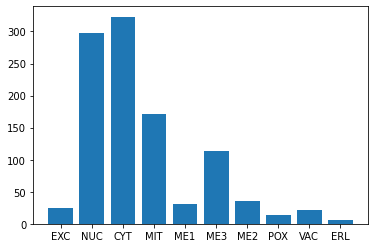

In [6]:
# summarize distribution
counter = Counter(train_labels)
for k,v in counter.items():
	per = v / len(train_labels) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [7]:
oversample = SMOTE()
train_features, train_labels = oversample.fit_resample(train_features, train_labels)

train_features.shape

(3230, 8)

Class=EXC, n=323 (10.000%)
Class=NUC, n=323 (10.000%)
Class=CYT, n=323 (10.000%)
Class=MIT, n=323 (10.000%)
Class=ME1, n=323 (10.000%)
Class=ME3, n=323 (10.000%)
Class=ME2, n=323 (10.000%)
Class=POX, n=323 (10.000%)
Class=VAC, n=323 (10.000%)
Class=ERL, n=323 (10.000%)


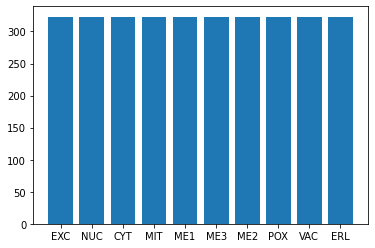

In [8]:
# summarize distribution
counter = Counter(train_labels)
for k,v in counter.items():
	per = v / len(train_labels) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [9]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_labels)
train_labels = encoder.transform(train_labels)
val_labels = encoder.transform(val_labels)
test_labels = encoder.transform(test_labels)
all_labels = encoder.transform(all_labels)

# convert integers to dummy variables (i.e. one hot encoded)
train_labels = np_utils.to_categorical(train_labels)
val_labels = np_utils.to_categorical(val_labels)
test_labels = np_utils.to_categorical(test_labels)
all_labels = np_utils.to_categorical(all_labels)

In [10]:
# standardize the input features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)
#print(train_features)

# normalizer = Normalizer()
# train_features = normalizer.fit_transform(train_features)
# val_features = normalizer.transform(val_features)
# test_features = normalizer.transform(test_features)
# print(train_features)

print("Training labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

print("Training features shape:", train_features.shape)
print("Validation features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

Training labels shape: (3230, 10)
Validation labels shape: (225, 10)
Test labels shape: (224, 10)
Training features shape: (3230, 8)
Validation features shape: (225, 8)
Test features shape: (224, 8)


In [11]:
# DEFINE THE MODEL AND METRICS

METRICS = [
  keras.metrics.CategoricalAccuracy(name='accuracy'),
  keras.metrics.Precision(name='precision'),
  keras.metrics.Recall(name='recall'),
  keras.metrics.AUC(name='auc'),
  keras.metrics.AUC(name='prc', curve='PR'),
]

def make_model(metrics=METRICS, output_bias=None, optimizer = "adam"):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential()
  model.add(keras.layers.Dense(12, input_dim=8, activation="relu"))
  model.add(keras.layers.Dense(11, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax", bias_initializer=output_bias))

  model.compile(
      optimizer=optimizer,
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=metrics
  )

  return model

In [12]:
# BASELINE MODEL
# Build the model
EPOCHS = 100
BATCH_SIZE = 5

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    verbose=1,
    patience=50,
    mode="min",
    restore_best_weights=True
)

In [13]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 11)                143       
                                                                 
 dense_2 (Dense)             (None, 10)                120       
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [14]:
'''
CYT: 463 (31.20% of total)  - 0.3120
NUC: 429 (28.91% of total)  - 0.2891
MIT: 244 (16.44% of total)  - 0.1644
ME3: 163 (10.98% of total)  - 0.1098
ME2: 51 (3.44% of total)    - 0.0344
ME1: 44 (2.96% of total)    - 0.0296
EXC: 35 (2.36% of total)    - 0.0236
VAC: 30 (2.02% of total)    - 0.0202
POX: 20 (1.35% of total)    - 0.0135
ERL: 5 (0.34% of total)     - 0.0034
'''

initial_bias = [1.5, 1.4, 0.84, 0.41, -0.72, -0.9, -1.1, -1.25, -1.7, -3]

# frequency = [(math.exp(b) / sum([math.exp(c) for c in biases])) for b in biases]
# print(frequency)

In [15]:
# Checkpoint the initial weights

initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [16]:
# Train the model

model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels))

Epoch 1/100
646/646 [==============================] - 4s 4ms/step - loss: 1.8259 - accuracy: 0.3573 - precision: 0.8773 - recall: 0.1040 - auc: 0.7812 - prc: 0.4119 - val_loss: 1.5923 - val_accuracy: 0.4311 - val_precision: 0.7000 - val_recall: 0.0311 - val_auc: 0.8698 - val_prc: 0.4198
Epoch 2/100
646/646 [==============================] - 2s 2ms/step - loss: 1.2483 - accuracy: 0.5641 - precision: 0.8823 - recall: 0.2854 - auc: 0.9133 - prc: 0.6436 - val_loss: 1.4344 - val_accuracy: 0.4711 - val_precision: 0.7000 - val_recall: 0.2178 - val_auc: 0.8840 - val_prc: 0.4815
Epoch 3/100
646/646 [==============================] - 2s 3ms/step - loss: 1.0603 - accuracy: 0.6093 - precision: 0.8356 - recall: 0.4059 - auc: 0.9384 - prc: 0.7073 - val_loss: 1.4307 - val_accuracy: 0.4578 - val_precision: 0.6706 - val_recall: 0.2533 - val_auc: 0.8830 - val_prc: 0.4853
Epoch 4/100
646/646 [==============================] - 2s 2ms/step - loss: 0.9661 - accuracy: 0.6319 - precision: 0.8279 - recall: 0.

In [17]:
# Evaluate metrics
train_predictions_baseline = model.predict(train_features)
test_predictions_baseline = model.predict(test_features)

train_predictions_baseline_encoded = train_predictions_baseline.argmax(1)
test_predictions_baseline_encoded = test_predictions_baseline.argmax(1)

In [18]:
train_labels_encoded = train_labels.argmax(1)
test_labels_encoded = test_labels.argmax(1)

In [19]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

loss :  0.5142259001731873
accuracy :  0.8114551305770874
precision :  0.8662513494491577
recall :  0.7318885326385498
auc :  0.984777569770813
prc :  0.9013278484344482



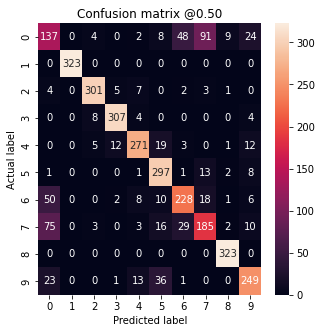

In [20]:
baseline_results_train = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results_train):
  print(name, ': ', value)
print()

plot_cm(train_labels_encoded, train_predictions_baseline_encoded)

loss :  1.7344235181808472
accuracy :  0.5133928656578064
precision :  0.574999988079071
recall :  0.4107142984867096
auc :  0.9058181047439575
prc :  0.5524765849113464



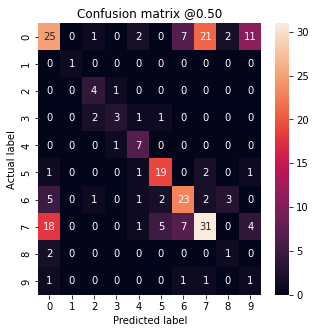

In [21]:
baseline_results = model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels_encoded, test_predictions_baseline_encoded)

In [25]:
# weight = model.get_weights()
# np.savetxt('weight.csv' , weight , fmt='%s', delimiter=',')

print(model.get_weights())

[array([[-1.0371544 ,  0.24107018,  0.19888107, -0.39403558, -0.57991576,
         0.7811768 ,  1.1381787 , -0.48150656,  0.77028996, -0.98814976,
        -0.79276234,  1.886355  ],
       [-0.48023292,  0.281883  , -0.49162304, -0.2736657 , -1.0890778 ,
         1.0635422 ,  0.22176245,  1.1145309 , -0.34051266, -0.07835048,
        -0.23753053, -0.04411686],
       [-0.44887617,  0.68333226, -0.0653076 , -0.9803281 ,  1.4683349 ,
        -1.0349183 , -0.040626  , -0.23099315,  0.11721054,  1.4908166 ,
        -1.4200885 ,  0.5422489 ],
       [-0.28787032, -0.41759807, -1.1537001 , -0.6171423 ,  1.122621  ,
        -1.2276573 ,  0.85518986, -0.58229053, -0.7143138 ,  0.500587  ,
         0.3294535 , -0.10804477],
       [ 0.26047233, -0.89519596, -0.03969692,  0.73164696,  0.28198493,
        -0.9372319 ,  0.24642272,  0.07795317,  1.471696  , -1.1330851 ,
        -0.3646253 , -0.4672229 ],
       [-1.0207477 ,  1.0781975 ,  0.95801073, -0.3465571 , -0.45271355,
         0.14481974, 